In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.patches as patches
import scipy.stats as stats
from sklearn.neighbors import KernelDensity
from shapely.geometry import Point
from shapely.geometry.polygon import LinearRing,Polygon

# is_in_region(point, bot left grid, top left grid, top right grid, bot right grid )
def is_in_region(x, y, a1, a2, b1, b2, c1, c2, d1, d2):
    point = Point(x,y)
    polygon = Polygon([(a1,a2), (b1,b2), (c1,c2), (d1,d2)])
    return polygon.contains(point)

### Data I/O

### Read in EJ file

In [3]:
# later time step
nn = 350
# step interval
dn = 10

filename=('./output/run5018_EJ_bar_t%3.3d_t%3.3d.dat')%(nn, nn+dn)
x,y,ang,da,Ej,dEj = np.loadtxt(filename,usecols=[0,1,2,3,4,5],unpack=True)

omega_bar = 0.542
omega_spiral = 0.228

CR_bar = 3.2
CR_spiral = 7.0
Sep = 5.0

R_max = 8.

### 1. plot E<sub>J</sub> - &Delta;E<sub>J</sub>, and dissect it into different regions

### L<sub>Z</sub> in the bar frame

(-1.5, 1.5)

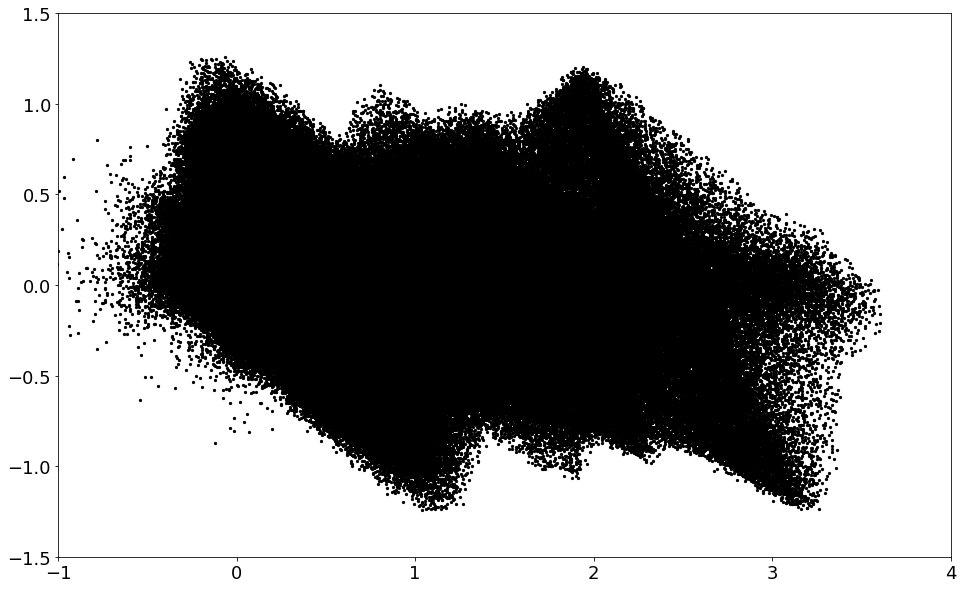

In [4]:
# test results
fig = plt.figure(figsize=(16, 10), dpi=72, facecolor="white")
ax = plt.subplot(111)
ax.cla()
ax.tick_params(direction='out',labelsize=18)

xmin = -1
xmax = 4
ymin = -1.5
ymax = 1.5

plt.scatter(ang, da, c='k', s=5)
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log


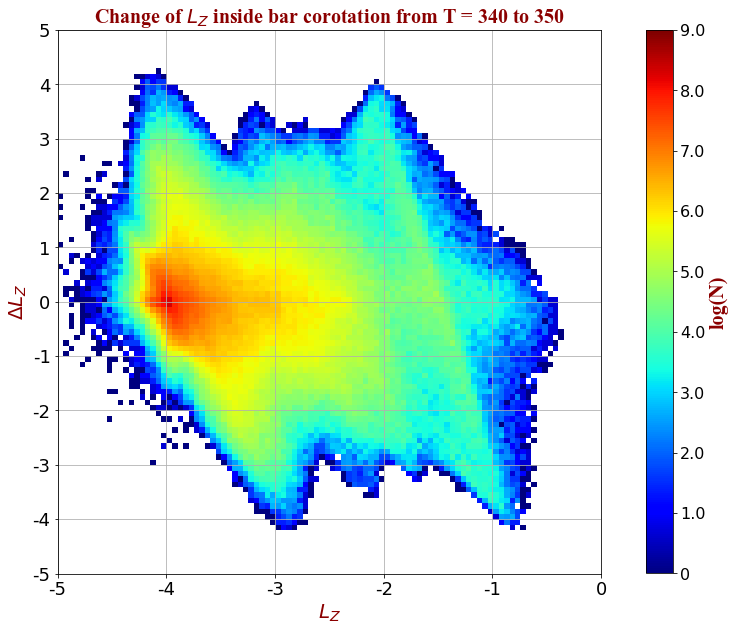

In [5]:
fig = plt.figure(figsize=(16, 10), dpi=72, facecolor="white")
ax = plt.subplot(111)
ax.cla()
ax.tick_params(direction='out',labelsize=18)

# set font
font = {'family' : 'Times New Roman',
        'color'  : 'darkred',
        'weight' : 'normal',
        'size'   : 20,
       }

#extent
extent=(0,1,0,1)
#cmap
cmap=plt.cm.get_cmap('jet')
#normalize colorbar
#norm= matplotlib.colors.Normalize(vmin=0,vmax=5)
#Ej, \delta_{Ej}-plane
H,xedges,yedges = np.histogram2d(da,ang,bins=(100,100),range=([ymin, ymax],[xmin,xmax]))
X,Y = np.meshgrid(xedges,yedges)

gci=plt.imshow(np.log(H),interpolation='nearest',extent=extent,origin='low',cmap=cmap)

# plot grid
plt.grid(True)

# plot polygons
#ax.plot(bx, by, linewidth = 2.)
#ax.plot(cr1x, cr1y, linewidth = 2.)
#ax.plot(cr2x, cr2y, linewidth = 2.)
#ax.plot(spx, spy, linewidth = 2.)

#set ticks
ax = plt.gca()
#ax.set_xlabel('X')
ax.set_xticks(np.linspace(0,1,6))
ax.set_xticklabels( ('-5', '-4', '-3', '-2', '-1', '0'))
#ax.set_ylabel('Y')
ax.set_yticks(np.linspace(0,1,11))
ax.set_yticklabels( ('-5', '-4', '-3', '-2', '-1', '0', '1', '2', '3', '4', '5'))

#set labels
ax.set_xlabel('$L_{Z}$',fontdict=font)
ax.set_ylabel('$\Delta L_{Z}$',fontdict=font)

#colorbar
cbar = fig.colorbar(gci)
cbar.set_label('log(N)',fontdict=font)
cbar.set_ticks(np.linspace(0,9,10))
cbar.set_ticklabels( ('0', '1.0', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0', '9.0'))
cbar.ax.tick_params(labelsize=16)
plt.clim(0,9)

#title
titleStr='Change of $L_{Z}$ inside bar corotation from T = '+str(nn-dn)+' to '+str(nn)
plt.title(titleStr,fontdict=font)

#savefig
figname1='./output/da_bar_t'+str(nn)+'_to_'+str(nn+dn)+'_color.png'
plt.savefig(figname1)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


(-3.0, 3.0)

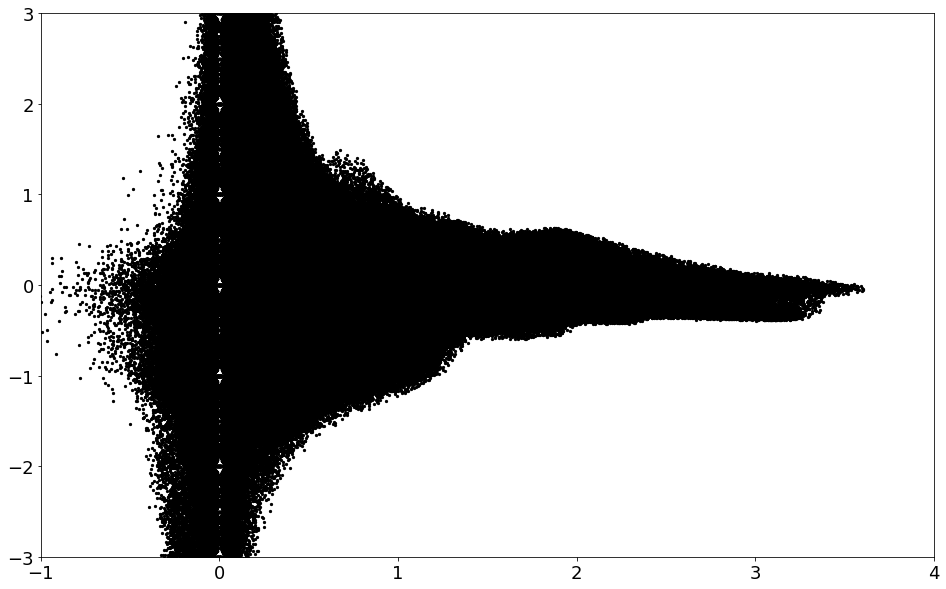

In [6]:
# test results
fig = plt.figure(figsize=(16, 10), dpi=72, facecolor="white")
ax = plt.subplot(111)
ax.cla()
ax.tick_params(direction='out',labelsize=18)

ymin = -3.0
ymax = 3.0

plt.scatter(ang, da/ang, c='k', s=5)
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log


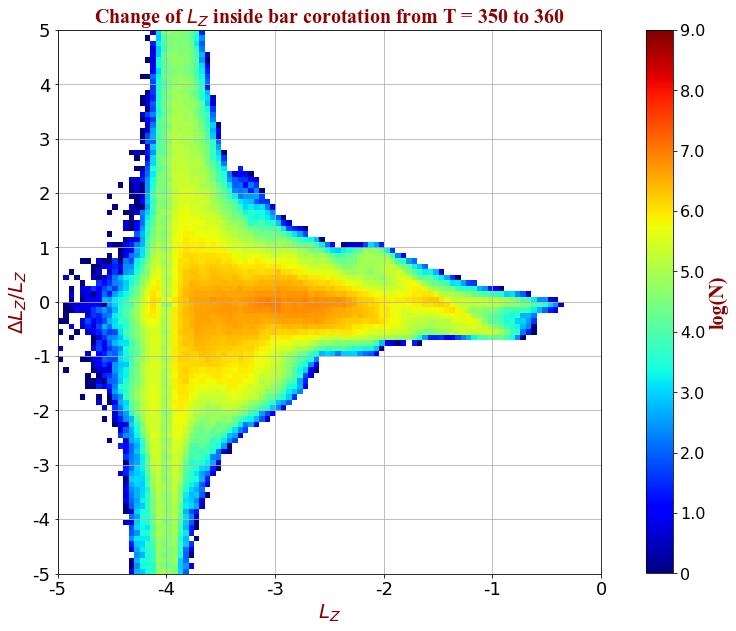

In [7]:
fig = plt.figure(figsize=(16, 10), dpi=72, facecolor="white")
ax = plt.subplot(111)
ax.cla()
ax.tick_params(direction='out',labelsize=18)

# set font
font = {'family' : 'Times New Roman',
        'color'  : 'darkred',
        'weight' : 'normal',
        'size'   : 20,
       }

#extent
extent=(0,1,0,1)
#cmap
cmap=plt.cm.get_cmap('jet')
#normalize colorbar
#norm= matplotlib.colors.Normalize(vmin=0,vmax=5)
#Ej, \delta_{Ej}-plane
H,xedges,yedges = np.histogram2d(da/ang,ang,bins=(100,100),range=([ymin, ymax],[xmin, xmax]))
X,Y = np.meshgrid(xedges,yedges)

gci=plt.imshow(np.log(H),interpolation='nearest',extent=extent,origin='low',cmap=cmap)

# plot grids
plt.grid(True)

# plot polygons
#ax.plot(bx, by, linewidth = 2.)
#ax.plot(cr1x, cr1y, linewidth = 2.)
#ax.plot(cr2x, cr2y, linewidth = 2.)
#ax.plot(spx, spy, linewidth = 2.)

#set ticks
ax = plt.gca()
#ax.set_xlabel('X')
ax.set_xticks(np.linspace(0,1,6))
ax.set_xticklabels( ('-5', '-4', '-3', '-2', '-1', '0'))
#ax.set_ylabel('Y')
ax.set_yticks(np.linspace(0,1,11))
ax.set_yticklabels( ('-5', '-4', '-3', '-2', '-1', '0', '1', '2', '3', '4', '5'))

#set labels
ax.set_xlabel('$L_{Z}$',fontdict=font)
ax.set_ylabel('$\Delta L_{Z}/L_{Z}$',fontdict=font)

#colorbar
cbar = fig.colorbar(gci)
cbar.set_label('log(N)',fontdict=font)
cbar.set_ticks(np.linspace(0,9,10))
cbar.set_ticklabels( ('0', '1.0', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0', '9.0'))
cbar.ax.tick_params(labelsize=16)
plt.clim(0,9)

#title
titleStr='Change of $L_{Z}$ inside bar corotation from T = '+str(nn)+' to '+str(nn+dn)
plt.title(titleStr,fontdict=font)

#savefig
figname2='./output/da_ang_bar_t'+str(nn)+'_to_'+str(nn+dn)+'_color.png'
plt.savefig(figname2)

### 2. RMS of Lz